In [54]:
pip install imblearn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.3 MB/s eta 0:00:00m eta 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
# from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
# from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
# import keras
# from keras.models import Sequential
# from keras.layers import Dense,Embedding,LSTM,Dropout
# from keras.callbacks import ReduceLROnPlateau
# import tensorflow as tf

In [2]:
true = pd.read_csv("archive/DataSet_Misinfo_TRUE.csv")
print(true.shape)
true.head()
true = true.dropna()
print(true.shape)

false = pd.read_csv("archive/DataSet_Misinfo_FAKE.csv")
print(false.shape)
false.head()
false = false.dropna()
print(false.shape)

(34975, 2)
(34946, 2)
(43642, 2)
(43642, 2)


In [3]:
true['category'] = 1
false['category'] = 0

In [4]:
true.head()

Unnamed: 0                                               text  category
0           0  The head of a conservative Republican faction ...         1
1           1  Transgender people will be allowed for the fir...         1
2           2  The special counsel investigation of links bet...         1
3           3  Trump campaign adviser George Papadopoulos tol...         1
4           4  President Donald Trump called on the U.S. Post...         1

## Similar Headlines

In [27]:
true_news = list(df_true["text"].values)
fake_news = list(df_false["text"].values)

s_true = []
s_false =[]
for i in true_news:
    if len(i) < 800:
        s_true.append(i)
for i in fake_news:
    if len(i) < 800:
        s_false.append(i)
print(len(s_true))
s_true = s_true[:7055]
s_false = s_false[:7055]
sentences = s_true + s_false

vectorizer = TfidfVectorizer()

# Create tf-idf matrix for sentences
tfidf_matrix = vectorizer.fit_transform(sentences)

# Calculate cosine similarity between the sentences
similarity_matrix = cosine_similarity(tfidf_matrix)

# Iterate through the similarity matrix to find the most similar sentences
max_sim = 50
max_pair = None
for i in tqdm(range(len(s_true))):
    for j in range(len(s_false)):
        if similarity_matrix[i][j+len(s_true)] > 0.6:
            #max_sim = similarity_matrix[i][j+len(s_true)]
            max_pair = (s_true[i], s_false[j])
            print(s_true[i])
            print('-'*50)
            print(s_false[j])
            print("*"*50)
            

# Print the most similar pair of sentences and their similarity score
print("Most similar pair: ")
print(max_pair[0])
print('-'*50)
print(max_pair[1])
print("Similarity score: ")
print(max_sim)


7055


 47%|█████████████████▊                    | 3316/7055 [00:08<00:09, 409.78it/s]

President Barack Obama will meet with Democratic presidential candidate Bernie Sanders at the White House on Wednesday, the White House said on Tuesday. “The two will meet privately in the Oval Office and there will be no formal agenda,” White House spokesman Josh Earnest said. Sanders, a Vermont senator and self-described democratic socialist, is challenging former Secretary of State Hillary Clinton for the Democratic nomination for the November presidential election.  (Reporting by Eric Beech; Editing by Eric Walsh) SAP is the sponsor of this coverage which is independently produced by the staff of Reuters News Agency.
--------------------------------------------------
Has our lawless President finally conceded that even he can t save the head of the Clinton Crime Syndicate? Oh well, lucky for Hillary that  Orange is the new black! President Barack Obama will meet with Democratic presidential candidate Bernie Sanders at the White House on Wednesday, the White House said on Tuesday. T

100%|██████████████████████████████████████| 7055/7055 [00:17<00:00, 403.54it/s]

Most similar pair: 
Ted Cruz
--------------------------------------------------
This is so great! Ted Cruz knows his Constitution!
Similarity score: 
50


## Cleaning and Processing

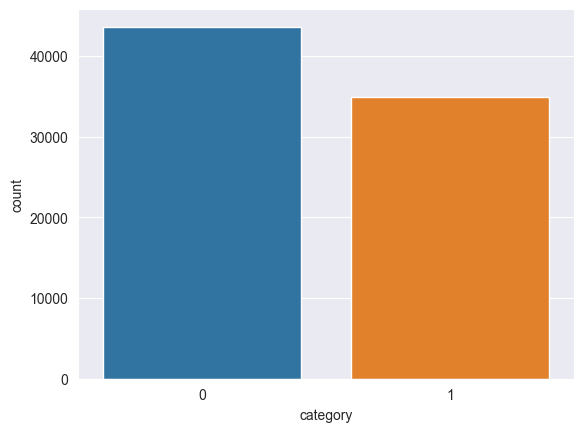

In [13]:
df = pd.concat([true,false]) #Merging the 2 datasets
df = df.dropna()

sns.countplot(x='category', data=df)

# Count Distribution
plt.show()

# Checking Null Values

In [14]:
df.isna().sum() # Checking for nan Values

Unnamed: 0    0
text          0
category      0
dtype: int64

# Stop Words

In [19]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [23]:
# Extract texts from HTML

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['text']=df['text'].apply(denoise_text)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=cJZFepSvxzM" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "h

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bs4/_

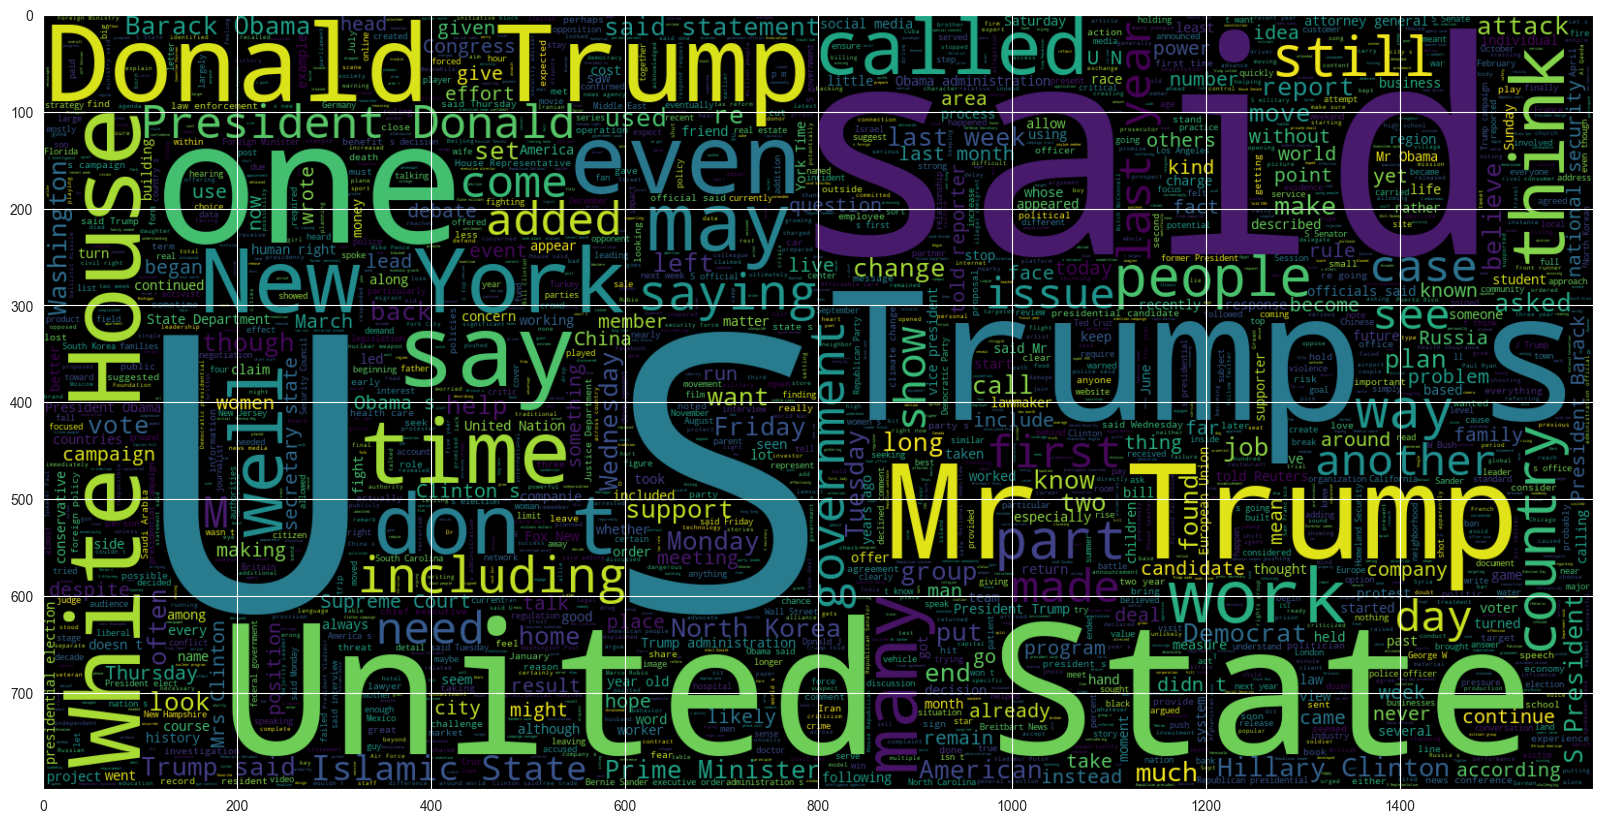

In [25]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

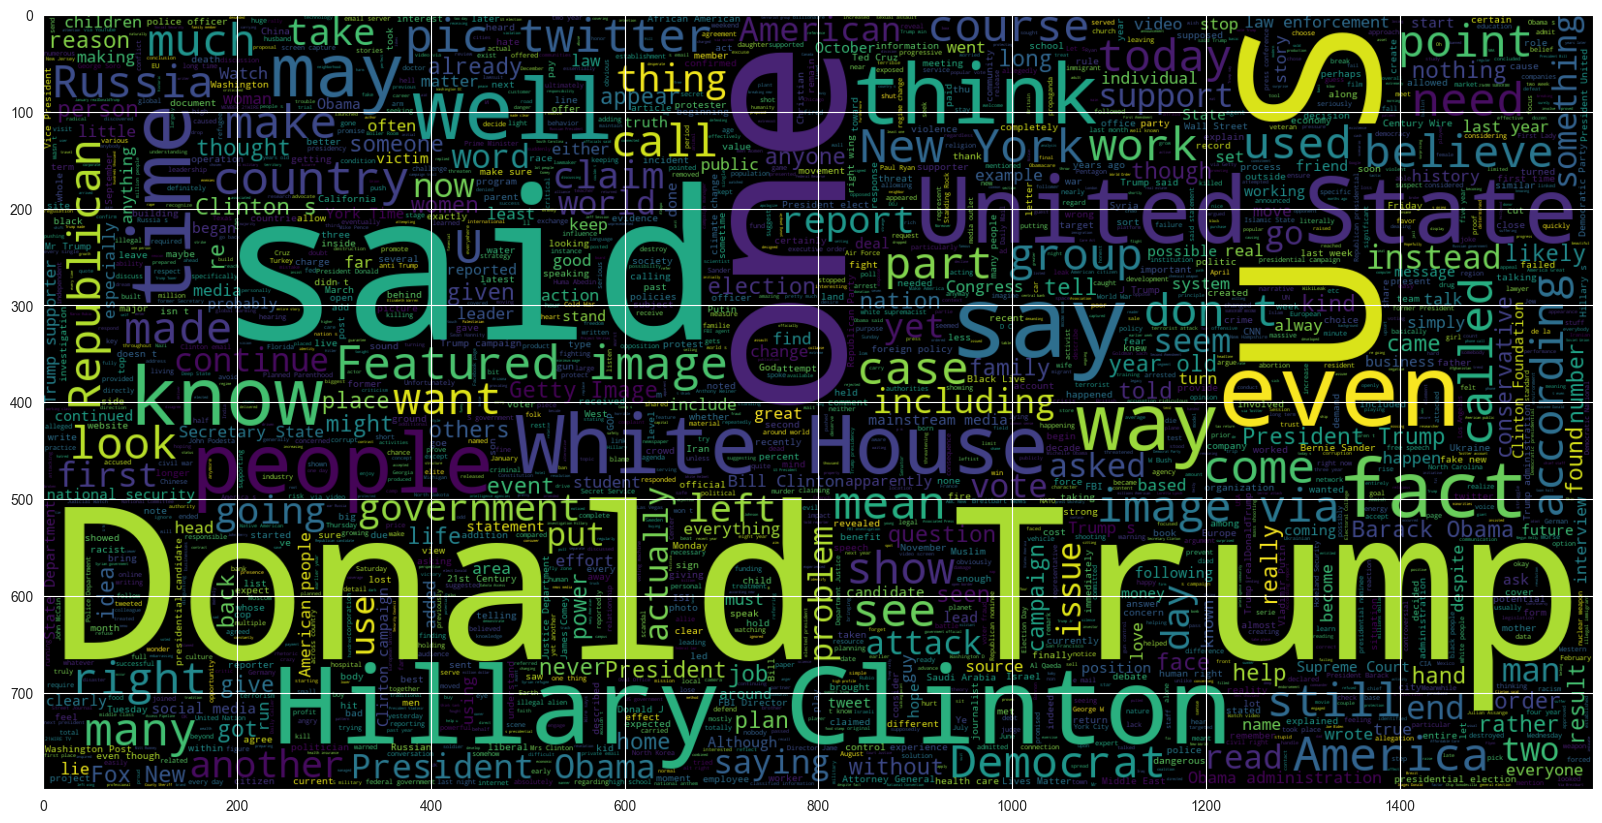

In [26]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

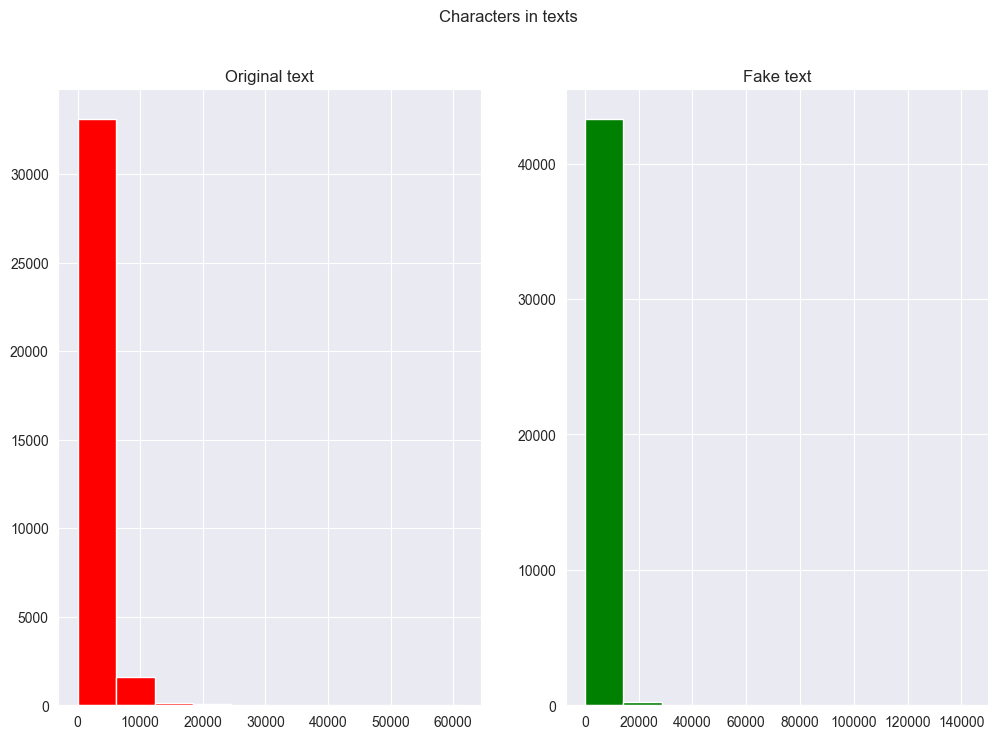

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

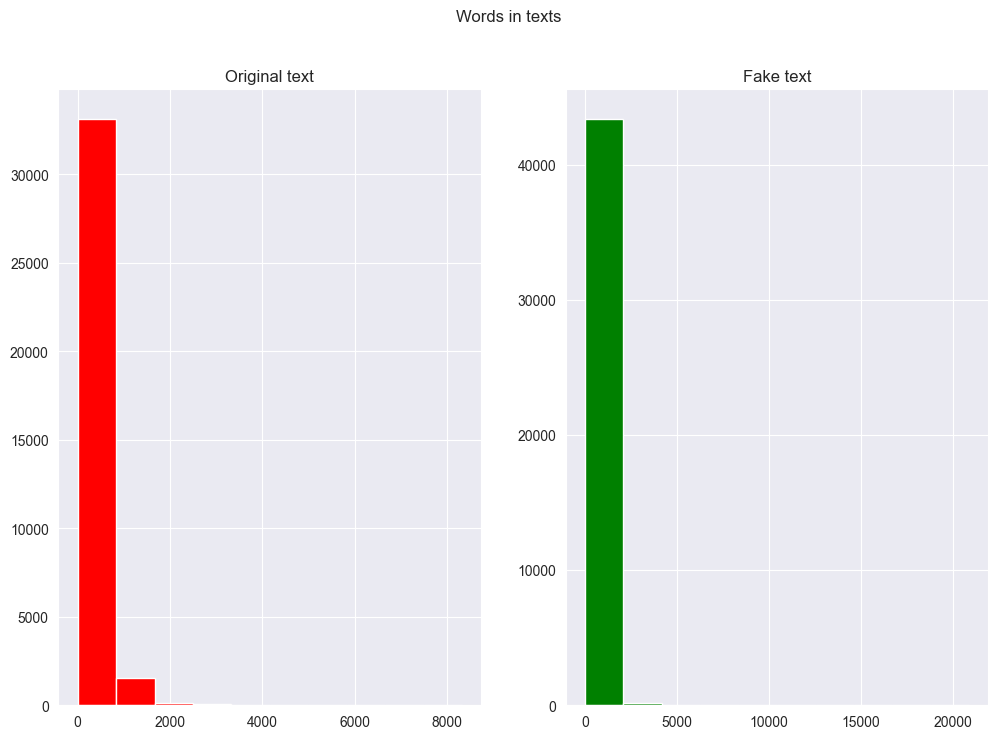

In [28]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

/var/folders/b0/nlrr4t_x3j5_jvwwktffc3j00000gn/T/ipykernel_69696/2368653048.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/b0/nlrr4t_x3j5_jvwwktffc3j00000gn/T/ipykernel_69696

Text(0.5, 0.98, 'Average word length in each text')

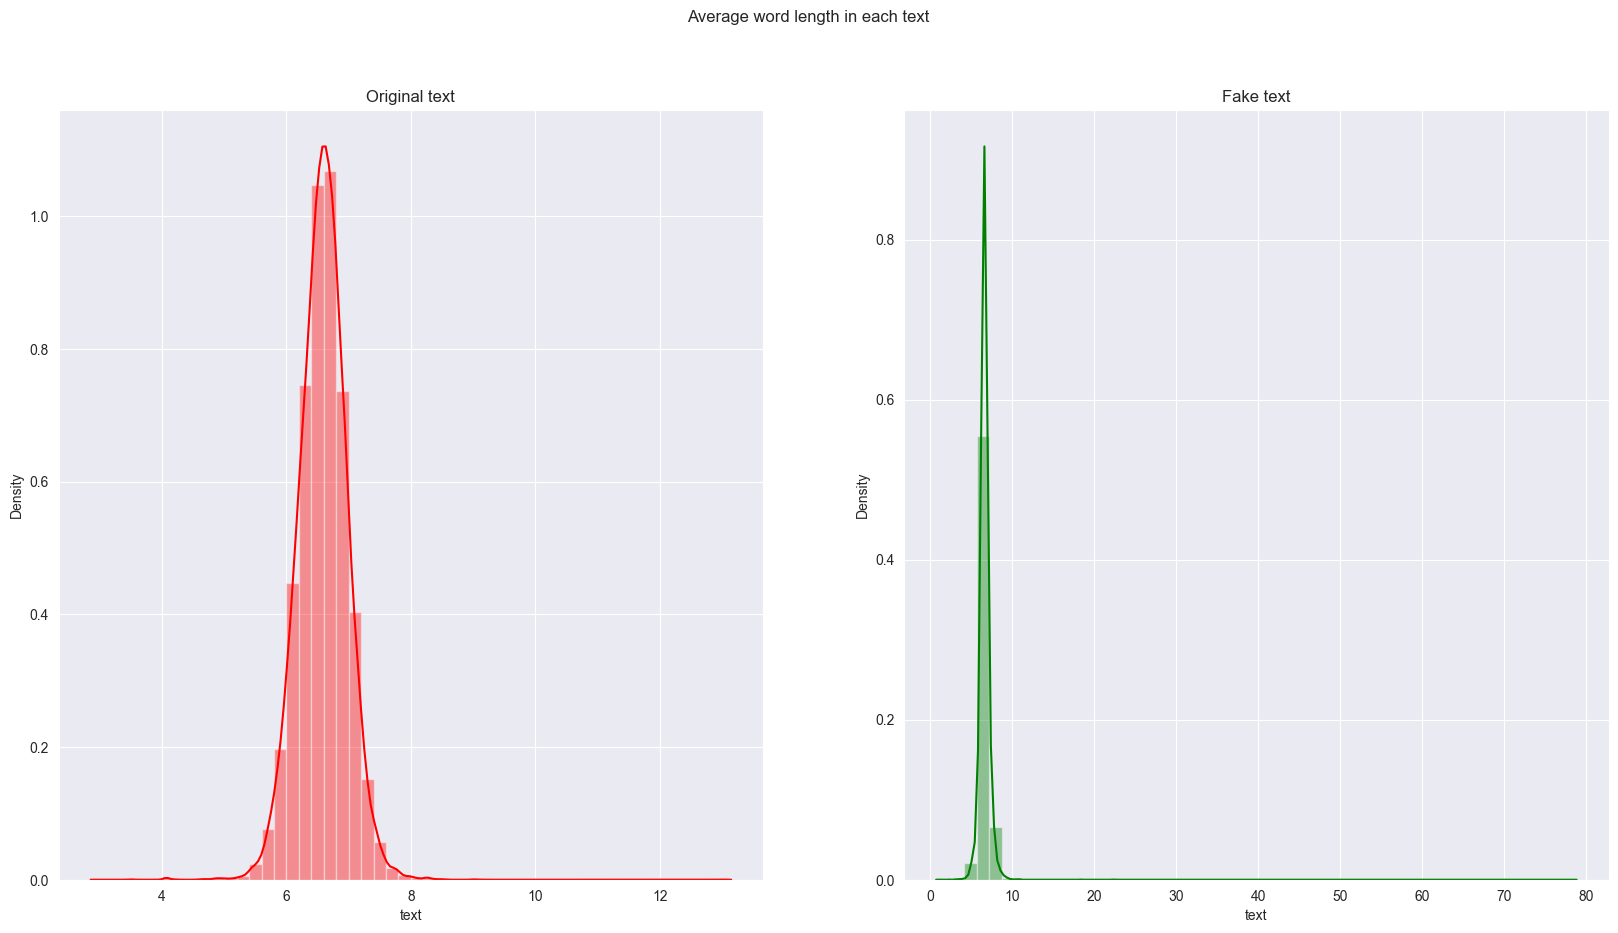

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [30]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

['head', 'conservative', 'Republican', 'faction', 'U.S.']

In [31]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 146571,
 'said': 142135,
 'would': 98283,
 'Mr.': 70112,
 'people': 67452,
 'one': 66046,
 'also': 59598,
 '—': 56188,
 'U.S.': 52148,
 'Clinton': 50500}

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

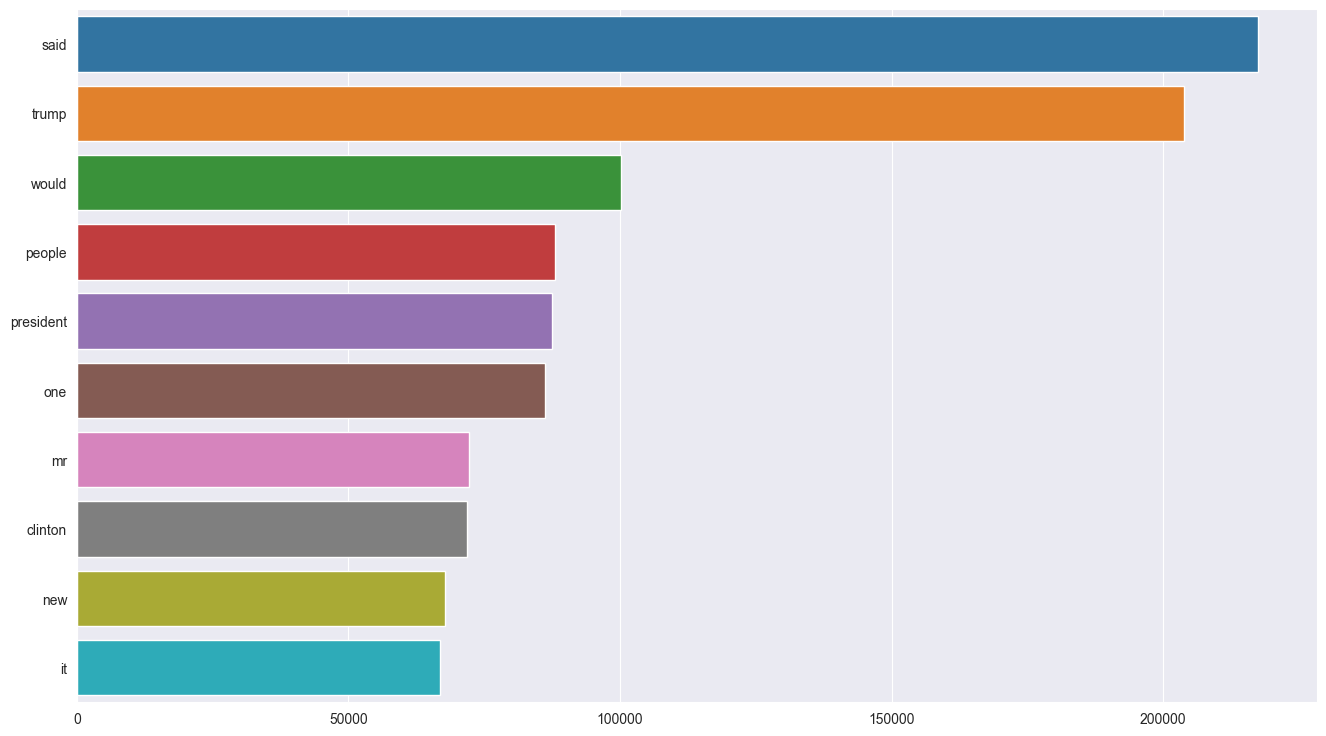

In [33]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<Axes: >

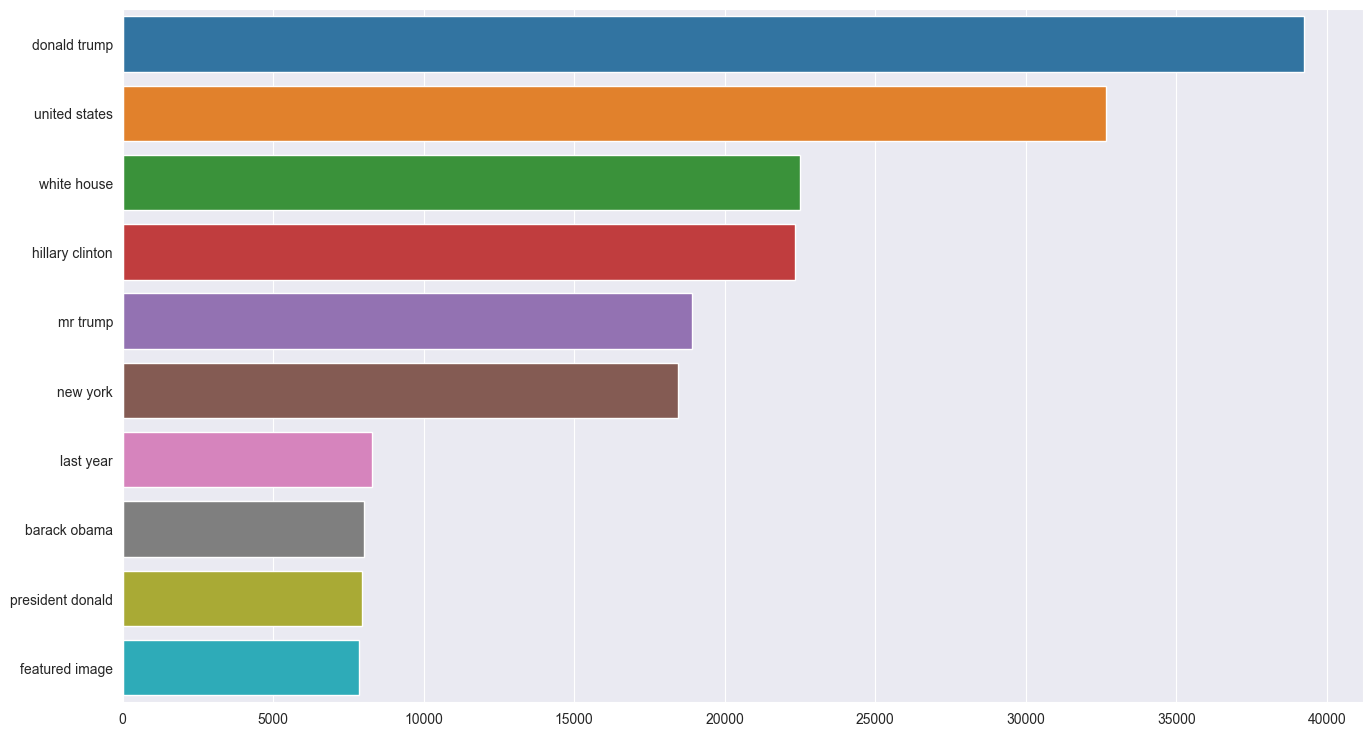

In [34]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

<Axes: >

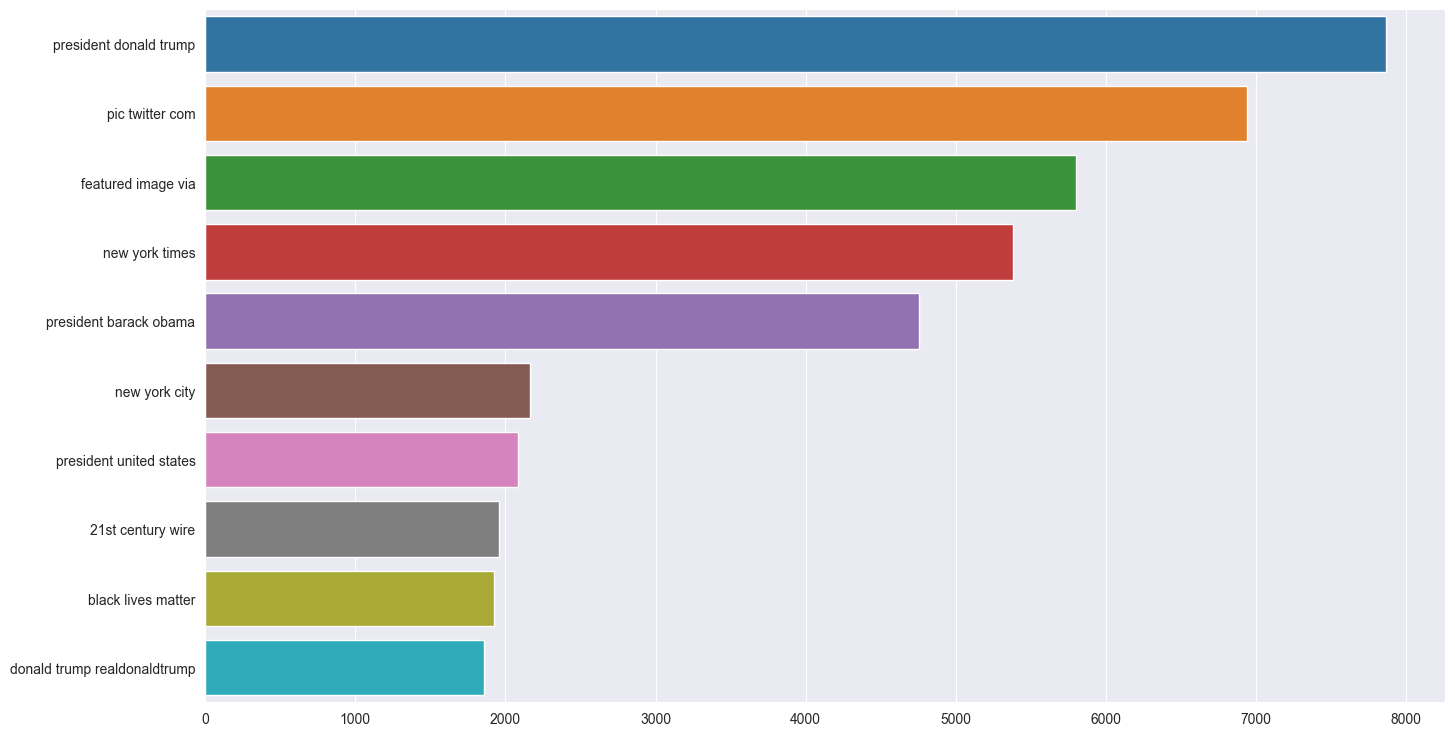

In [35]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

# Plotting - Original

In [109]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained SBERT model
model1 = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Define a list of sentences to embed
sentences = ['This is the first sentence.',
             'This is the second sentence.',
             'This is the third sentence.']




In [106]:
df.shape

(78588, 3)

Test accuracy: 0.69


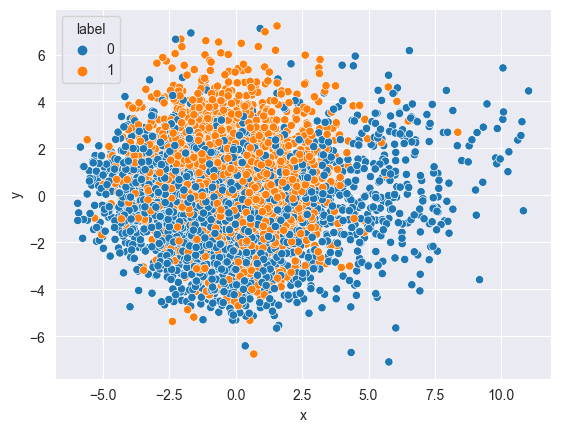

In [108]:
df = df.sample(frac=1).reset_index(drop=True)
sentences = list(df["text"].values)[:4000]

# Embed the sentences using the pre-trained SBERT model
sentence_embeddings = model.encode(sentences)
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(sentence_embeddings)
df_test = pd.DataFrame(pca_embeddings, columns=['x', 'y'])
df_test['label'] = list(df["category"].values)[:4000]

# Plot the embeddings in a scatter plot using seaborn
sns.scatterplot(data=df_test, x='x', y='y', hue='label')

# # Alternatively, plot the embeddings in a scatter plot using matplotlib
# plt.scatter(df['x'], df['y'], c=df['label'])
# plt.show()

x_train,x_test,y_train,y_test = train_test_split(sentence_embeddings,df["category"][:4000],random_state = 0)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print('Test accuracy:', accuracy)


# Prebuilt SMOTE

Original shape: (4000, 768)
Resampled shape: (4380, 768)
Test accuracy: 0.708675799086758


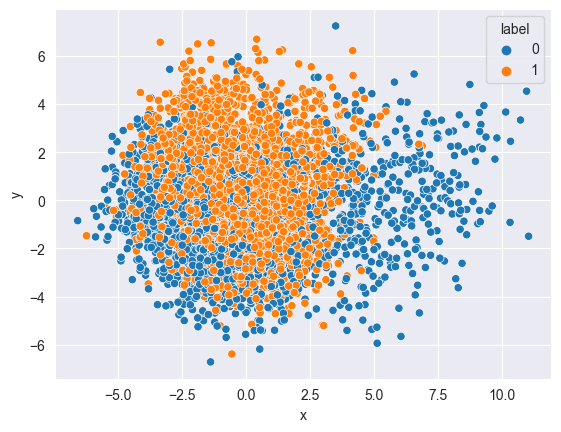

In [103]:
from sklearn.tree import DecisionTreeClassifier

smote = SMOTE()
embeddings_array = np.array(sentence_embeddings)

# Create a target variable with the same length as the embeddings
target = list(df_test['label'].values)

# Apply SMOTE to oversample the minority class (assuming that the minority class is labeled as 1)
smote = SMOTE()
embeddings_resampled, target_resampled = smote.fit_resample(embeddings_array, target)

# Print the shape of the resampled embeddings
print("Original shape:", embeddings_array.shape)
print("Resampled shape:", embeddings_resampled.shape)


pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings_resampled)
df_test_2 = pd.DataFrame(pca_embeddings, columns=['x', 'y'])
df_test_2['label'] = target_resampled

# Plot the embeddings in a scatter plot using seaborn
sns.scatterplot(data=df_test_2, x='x', y='y', hue='label')

x_train,x_test,y_train,y_test = train_test_split(embeddings_resampled,target_resampled,random_state = 0)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print('Test accuracy:', accuracy)


# BSMOTE

Original shape: (4000, 768)
Resampled shape: (4510, 768)
Test accuracy: 0.7118794326241135


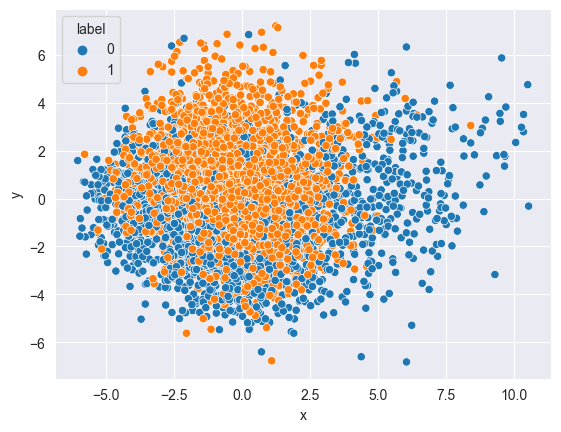

In [110]:
smote = BorderlineSMOTE()
embeddings_array = np.array(sentence_embeddings)

# Create a target variable with the same length as the embeddings
target = list(df_test['label'].values)

# Apply SMOTE to oversample the minority class (assuming that the minority class is labeled as 1)
smote = SMOTE()
embeddings_resampled, target_resampled = smote.fit_resample(embeddings_array, target)

# Print the shape of the resampled embeddings
print("Original shape:", embeddings_array.shape)
print("Resampled shape:", embeddings_resampled.shape)


pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings_resampled)
df_test_2 = pd.DataFrame(pca_embeddings, columns=['x', 'y'])
df_test_2['label'] = target_resampled

# Plot the embeddings in a scatter plot using seaborn
sns.scatterplot(data=df_test_2, x='x', y='y', hue='label')

x_train,x_test,y_train,y_test = train_test_split(embeddings_resampled,target_resampled,random_state = 0)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print('Test accuracy:', accuracy)


## KMEANS SMOTE

Original shape: (4000, 768)
Resampled shape: (4510, 768)
Test accuracy: 0.6826241134751773


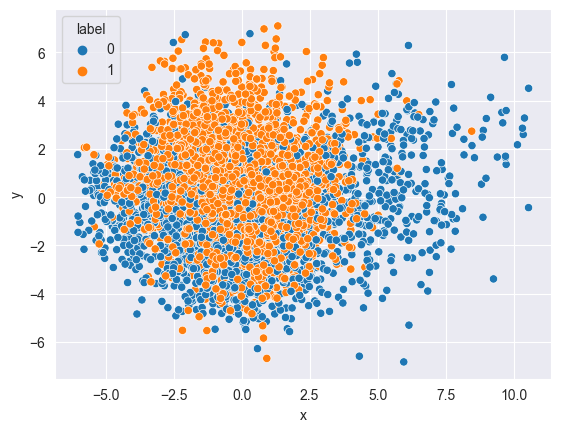

In [111]:
smote = KMeansSMOTE()
embeddings_array = np.array(sentence_embeddings)

# Create a target variable with the same length as the embeddings
target = list(df_test['label'].values)

# Apply SMOTE to oversample the minority class (assuming that the minority class is labeled as 1)
smote = SMOTE()
embeddings_resampled, target_resampled = smote.fit_resample(embeddings_array, target)

# Print the shape of the resampled embeddings
print("Original shape:", embeddings_array.shape)
print("Resampled shape:", embeddings_resampled.shape)


pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings_resampled)
df_test_2 = pd.DataFrame(pca_embeddings, columns=['x', 'y'])
df_test_2['label'] = target_resampled

# Plot the embeddings in a scatter plot using seaborn
sns.scatterplot(data=df_test_2, x='x', y='y', hue='label')


x_train,x_test,y_train,y_test = train_test_split(embeddings_resampled,target_resampled,random_state = 0)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print('Test accuracy:', accuracy)


# Custom Borderline SMOTE

4000 4000
6730 6730
Test accuracy: 0.7569815805109923


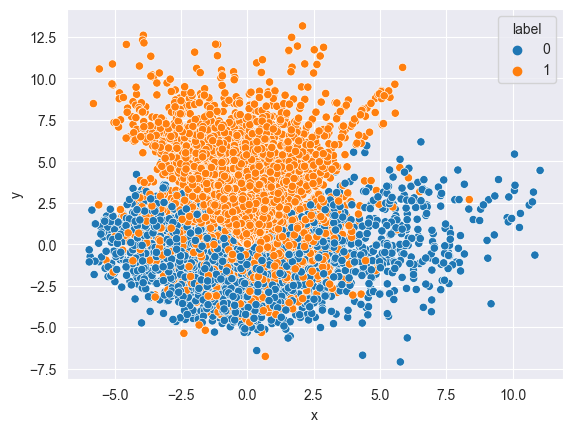

In [188]:
import math
import random

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two tuples.
    """
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)



pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(sentence_embeddings)
target = list(df_test['label'].values)
nearby_points = (0,6)
add_points = []
index = 0
for point_x, point_y in pca_embeddings:
    distance = euclidean_distance((point_x,point_y),nearby_points)
    if distance < 3.5 and target[index] == 1:
        add_points.append([point_x,point_y])
    index+=1


synthetic = []
for i in range(10):
    for j in range(len(add_points)):
        random_number = random.uniform(0, 2)
        synthetic.append([add_points[j][0]*random_number,add_points[j][1]*random_number])
print(len(pca_embeddings), len(target))
merged_arr = np.concatenate((pca_embeddings, synthetic), axis=0)
merged_target = target + [1]*len(synthetic)
print(len(merged_arr),len(merged_target))

df_test_3 = pd.DataFrame(merged_arr, columns=['x', 'y'])
df_test_3['label'] = merged_target

# Plot the embeddings in a scatter plot using seaborn
sns.scatterplot(data=df_test_3, x='x', y='y', hue='label')


x_train,x_test,y_train,y_test = train_test_split(merged_arr,merged_target,random_state = 0)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print('Test accuracy:', accuracy)


# Claim Identification

In [173]:
words_list = ['probably', 'perhaps', 'maybe','possible','may','can']
true_counter = 0
false_counter = 0

df_true = pd.read_csv("archive/DataSet_Misinfo_TRUE.csv")
df_true = df_true.dropna()

df_false = pd.read_csv("archive/DataSet_Misinfo_FAKE.csv")
df_false = df_false.dropna()

true_news = list(df_true["text"].values)
fake_news = list(df_false["text"].values)
    

In [183]:
true_counter = 0
data = {}
for i in tqdm(true_news):
    for word in words_list:
        if word in i:
            if word in data:data[word]+=1
            else:data[word]=1
            true_counter+=1
            break
print(true_counter)

100%|██████████████████████████████████| 34946/34946 [00:00<00:00, 66904.58it/s]

25865


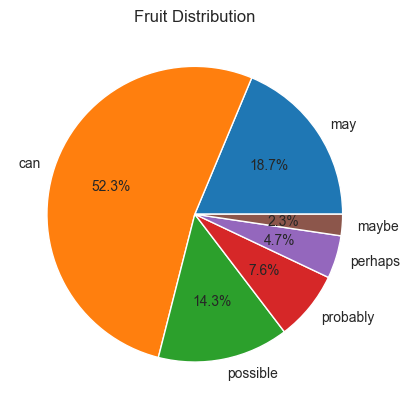

In [184]:
import matplotlib.pyplot as plt

# create a dictionary with some data


# get the labels and sizes from the dictionary
labels = list(data.keys())
sizes = list(data.values())

# create a pie chart with the labels and sizes
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# add a title to the chart
plt.title('Fruit Distribution')

# display the chart
plt.show()

In [180]:
false_counter = 0
data = {}
for i in tqdm(fake_news):
    for word in words_list:
        if word in i:
            if word in data : data[word]+=1
            else:data[word] = 1
            false_counter+=1
            break
print(false_counter)

100%|██████████████████████████████████| 43642/43642 [00:00<00:00, 89065.30it/s]

29690


In [181]:
data

{'can': 16056,
 'possible': 3048,
 'maybe': 1018,
 'may': 5205,
 'perhaps': 1397,
 'probably': 2966}

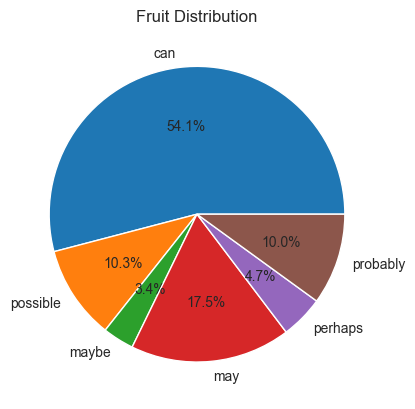

In [182]:
import matplotlib.pyplot as plt

# create a dictionary with some data


# get the labels and sizes from the dictionary
labels = list(data.keys())
sizes = list(data.values())

# create a pie chart with the labels and sizes
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# add a title to the chart
plt.title('Fruit Distribution')

# display the chart
plt.show()

In [185]:
df.shape

(78588, 3)